Assignment: Real Estate Market Insights
 
Task 1 — Load & Inspect the Dataset
1.	Load the dataset  into your notebook.
2.	Display the first 5 and last 5 rows of the dataset.
3.	Print dataset shape (rows, columns).
4.	Print dataset information using .info().
5.	Identify basic data types of all columns.

In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Nishath Tabassum\Downloads\Bengaluru_House_Data.csv")


In [4]:
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape


(13320, 9)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.dtypes


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

Task 2 — Clean the Dataset
Identify and count missing values in each column.
Drop column(s) that are irrelevant for price analysis (example: society or unnamed columns).
Handle missing values in numeric columns such as bath, balcony, etc. (use either dropna() or fillna() depending on your reasoning).
Convert total_sqft to numeric — handle values like "2100 - 2850" by converting them to an average or a single number.
Remove duplicate rows.
6. Reset the DataFrame index after cleaning

In [7]:
# Check how many missing values each column has
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df.drop(['society'],axis=1,inplace=True,errors='ignore')
df['bath'].fillna(df['bath'].median(),inplace=True)
df['balcony'].fillna(0,inplace=True)
# total_sqft cleanup
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None
 
df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

C:\Users\Nishath Tabassum\AppData\Local\Temp\ipykernel_21328\289373015.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(),inplace=True)
C:\Users\Nishath Tabassum\AppData\Local\Temp\ipykernel_21328\289373015.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [5]:
df['location'].nunique

<bound method IndexOpsMixin.nunique of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
12701           Green Glen Layout
12702                  Whitefield
12703               Richards Town
12704       Raja Rajeshwari Nagar
12705             Padmanabhanagar
Name: location, Length: 12706, dtype: object>

In [6]:
avg_price_location = df.groupby('location')['price'].mean().sort_values(ascending=False)
avg_price_location


location
Cubbon Road                  1900.000000
Ashok Nagar                  1486.000000
Defence Colony               1167.714286
Yemlur                       1093.388889
Church Street                1068.000000
                                ...     
Celebrity Paradise Layout      19.245000
BAGUR                          17.000000
Makali                         16.000000
 Anekal                        16.000000
Alur                           15.000000
Name: price, Length: 1299, dtype: float64

In [7]:
highest_avg_price_location = avg_price_location.head(1)
highest_avg_price_location


location
Cubbon Road    1900.0
Name: price, dtype: float64

In [8]:
df[['total_sqft', 'bath', 'price']].corr()


,total_sqft,bath,price
total_sqft,1.000000,0.385367,0.573858
bath,0.385367,1.000000,0.450564
price,0.573858,0.450564,1.000000


Task 4 — Data Visualization
Use the specific visualization types mentioned for each question.
Price Distribution:
Plot the distribution of the price column using a Histogram + KDE curve.
Relationship Between Area and Price:
Visualize the relationship between total_sqft and price using a Scatter Plot.
Effect of Bathrooms on Price:
Show how bath count affects house prices using a Box Plot.
Top 10 Most Expensive Locations:
Plot the Top 10 locations with highest average price using a Bar Chart.
Correlation Between Numeric Columns:
Create a Heatmap to visualize correlations among numeric features (price, total_sqft, bath, balcony, etc.).

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


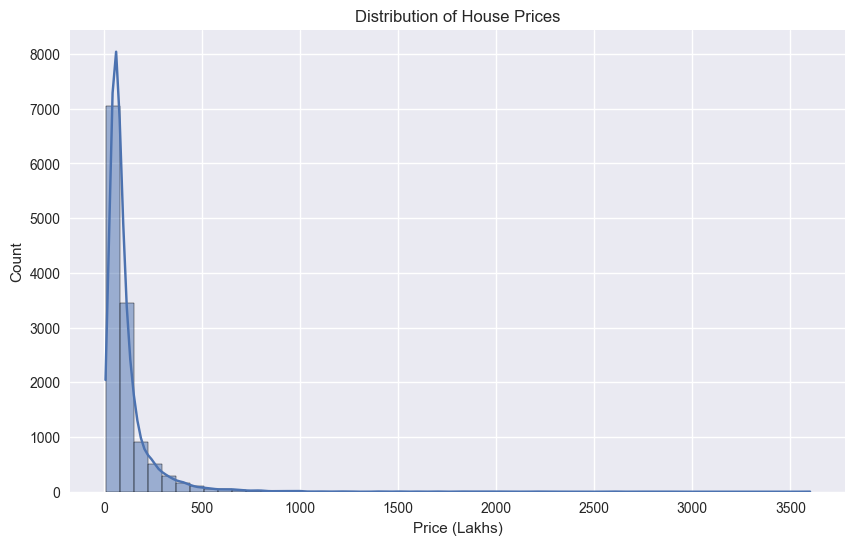

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()

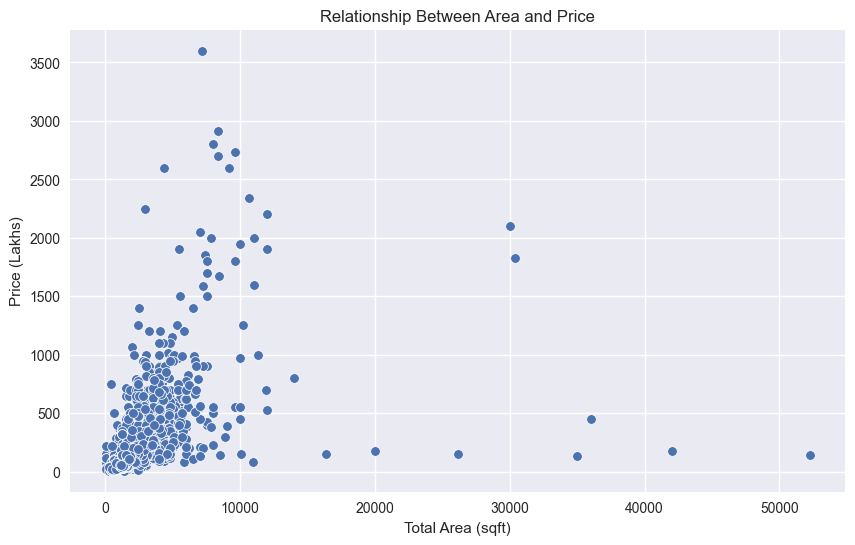

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['total_sqft'], y=df['price'])
plt.xlabel("Total Area (sqft)")
plt.ylabel("Price (Lakhs)")
plt.title("Relationship Between Area and Price")
plt.show()


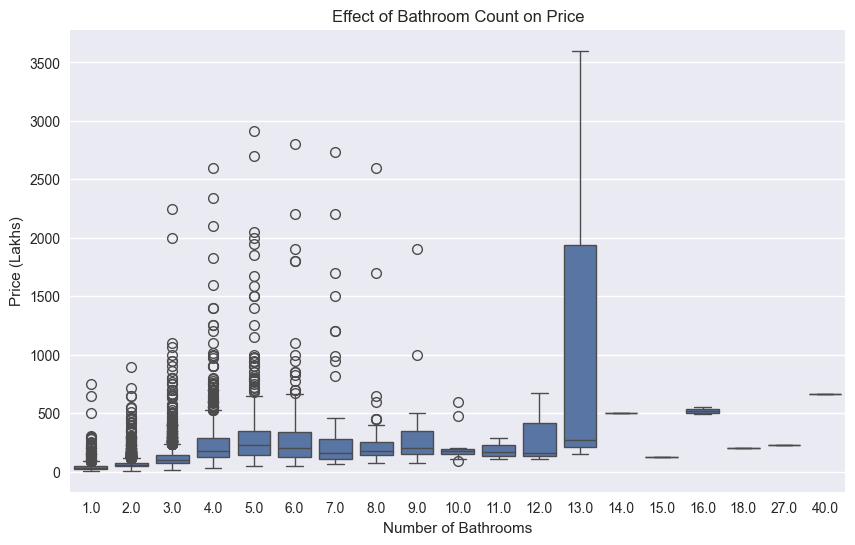

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['bath'], y=df['price'])
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price (Lakhs)")
plt.title("Effect of Bathroom Count on Price")
plt.show()


In [13]:
avg_price_location = df.groupby('location')['price'].mean().sort_values(ascending=False)


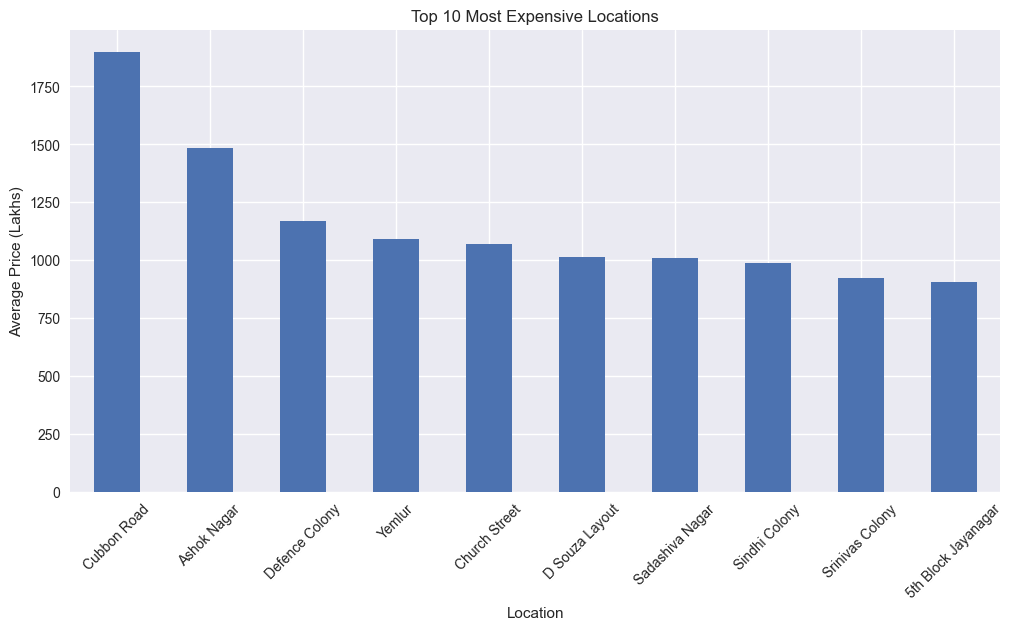

In [14]:
plt.figure(figsize=(12,6))
avg_price_location.head(10).plot(kind='bar')
plt.xlabel("Location")
plt.ylabel("Average Price (Lakhs)")
plt.title("Top 10 Most Expensive Locations")
plt.xticks(rotation=45)
plt.show()


In [15]:
numeric_df = df[['total_sqft', 'bath', 'balcony', 'price']]


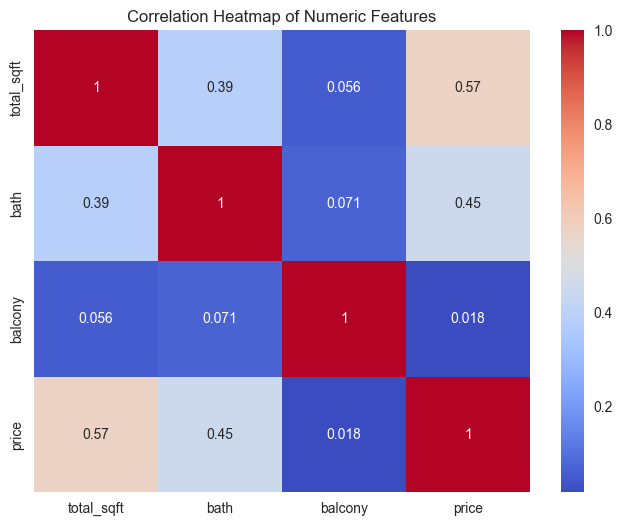

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [17]:
df.to_csv("cleaned_house_price_data.csv", index=False)
print("File saved successfully!")


File saved successfully!
